In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.cifar10.load_data()

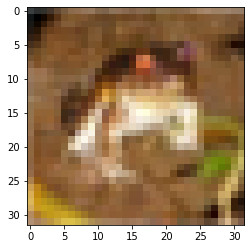

In [3]:
plt.imshow(X_train[0])

In [4]:
#this has 50000 images with 32*32 size and having 3 channels(R,G,B)
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]]) # this shows the ground truth value

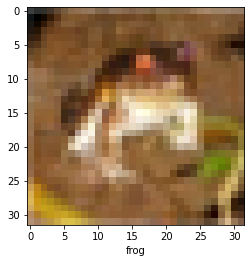

In [11]:
plot_sample(X_train, y_train, 0)

In [12]:
#normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
#cnn model
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#compile model
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#fit the data
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.9942 - accuracy: 0.2762
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6083 - accuracy: 0.4252
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4350 - accuracy: 0.4878
Epoch 4/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3356 - accuracy: 0.5288
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2542 - accuracy: 0.5584
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1845 - accuracy: 0.5857
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1246 - accuracy: 0.6076
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0739 - accuracy: 0.6268
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0270 - accuracy: 0.6431
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0437 - accuracy: 0.6387


[1.0436807870864868, 0.638700008392334]